In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import treecorr
from matplotlib import pyplot as plt

In [8]:
file_path = './Gamma_small_scales_sompz4_full.dat'

data = pd.read_csv(file_path, delimiter=' ', \
                   names=['Rg0', 'Ig0', 'Rg1', 'Ig1', 'Rg2', 'Ig2', 'Rg3', 'Ig3', 'd2', 'u', 'v'])

print(data.head())

            Rg0           Ig0           Rg1           Ig1           Rg2  \
0 -2.022310e-07 -4.561160e-14 -1.022220e-06  1.661710e-07 -1.022260e-06   
1 -2.161530e-07 -5.218580e-15 -7.513280e-07  4.058890e-07 -7.513280e-07   
2 -2.317540e-07  3.259590e-20 -4.486990e-07  5.133590e-07 -4.486980e-07   
3 -2.485230e-07  7.668510e-16 -1.666870e-07  5.006600e-07 -1.666870e-07   
4 -2.661780e-07 -1.556740e-14  5.832020e-08  3.951180e-07  5.832020e-08   

            Ig2           Rg3           Ig3        d2      u    v  
0 -1.661770e-07 -6.252620e-07 -7.258730e-14  0.629463  0.025  0.0  
1 -4.058890e-07 -6.375650e-07 -6.585270e-15  0.629463  0.075  0.0  
2 -5.133590e-07 -6.503860e-07 -2.499720e-15  0.629463  0.125  0.0  
3 -5.006600e-07 -6.632530e-07  1.436520e-14  0.629463  0.175  0.0  
4 -3.951180e-07 -6.759920e-07 -4.550880e-14  0.629463  0.225  0.0  


[0.629463 0.997631 1.58114  2.50594  3.97164 ]


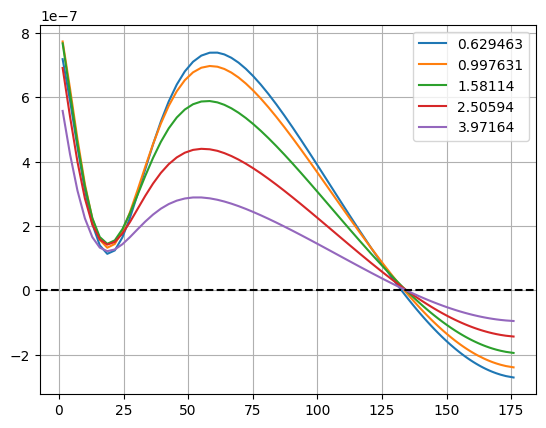

In [11]:
# u = d3/d2, v = (d1-d2)/d3
d2vals = np.sort(np.array(list(set(data["d2"]))))
print(d2vals)
g_ttt_model, phi_model = {}, {}
zeros_model = []
plt.figure()
for ind, d2 in enumerate(d2vals):
    d2data = data[data["d2"] == d2]
    g_ttt_model[ind] = -0.25 * (d2data["Rg0"] + d2data["Rg1"] + d2data["Rg2"] + d2data["Rg3"])
    phi_model[ind] = np.array(np.rad2deg(np.arccos(1 - (d2data["u"] + d2data["v"]) ** 2 / 2)))
    plt.plot(phi_model[ind], g_ttt_model[ind], label = d2)
    
    zeros_model += [(phi_model[ind])[np.argmin(np.abs(g_ttt_model[ind]))]]

plt.legend()
plt.axhline(y=0, ls="--", color="black")
plt.grid()
# plt.ylim([-1e-8, 1e-8])
# plt.xlim([132, 135])
plt.show()
# plt.close()

In [6]:
fold_path = "./../out/20230112_mike_paper/"

rmin = 0.5
rmax = 20
nr = 10

narrow = dict(min_sep=rmin, max_sep=rmax, sep_units='arcmin', nbins=nr,
              min_u=0.0, max_u=1, nubins=20,
              min_v=0.0, max_v=0.1, nvbins=1, verbose=2, output_dots=True)
wide = dict(min_sep=rmin, max_sep=rmax, sep_units='arcmin', nbins=nr,
            min_u=0.9, max_u=1, nubins=1,
            min_v=0.0, max_v=0.8, nvbins=20, verbose=2, output_dots=True)
wider = dict(min_sep=rmin, max_sep=rmax, sep_units='arcmin', nbins=nr,
             min_u=0.9, max_u=1, nubins=1,
             min_v=0.8, max_v=0.95, nvbins=20, verbose=2, output_dots=True)
widest = dict(min_sep=rmin, max_sep=rmax, sep_units='arcmin', nbins=nr,
              min_u=0.9, max_u=1, nubins=1,
              min_v=0.95, max_v=1.0, nvbins=20, verbose=2, output_dots=True)

print("narrow")
ggg1 = treecorr.GGGCorrelation(narrow)
ggg1.read(fold_path + 'narrow.hdf')

print("wide")
ggg2 = treecorr.GGGCorrelation(wide)
ggg2.read(fold_path + 'wide.hdf')

print("wider")
ggg3 = treecorr.GGGCorrelation(wider)
ggg3.read(fold_path + 'wider.hdf')

print("widest")
ggg4 = treecorr.GGGCorrelation(widest)
ggg4.read(fold_path + 'widest.hdf')

narrow
r: nbins = 10, min,max sep = 0.5..20 arcmin, bin_size = 0.368888
u: nbins = 20, min,max = 0..1, bin_size = 0.05
v: nbins = 1, min,max = 0..0.1, bin_size = 0.1
Reading GGG correlations from ./../out/20230112_mike_paper/narrow.hdf
   file_type assumed to be HDF from the file name.
wide
r: nbins = 10, min,max sep = 0.5..20 arcmin, bin_size = 0.368888
u: nbins = 1, min,max = 0.9..1, bin_size = 0.1
v: nbins = 20, min,max = 0..0.8, bin_size = 0.04
Reading GGG correlations from ./../out/20230112_mike_paper/wide.hdf
   file_type assumed to be HDF from the file name.
wider
r: nbins = 10, min,max sep = 0.5..20 arcmin, bin_size = 0.368888
u: nbins = 1, min,max = 0.9..1, bin_size = 0.1
v: nbins = 20, min,max = 0.8..0.95, bin_size = 0.0075
Reading GGG correlations from ./../out/20230112_mike_paper/wider.hdf
   file_type assumed to be HDF from the file name.
widest
r: nbins = 10, min,max sep = 0.5..20 arcmin, bin_size = 0.368888
u: nbins = 1, min,max = 0.9..1, bin_size = 0.1
v: nbins = 20, mi

phi:  (10, 20, 1)
meanr =   [ 0.63932957  0.92447111  1.33697843  1.93335322  2.79539791  4.04210939
  5.84424049  8.44858337 12.21196585 17.64650514]
phi:  (10, 1, 20)
meanr =   [ 0.61585524  0.89040679  1.28764906  1.86182665  2.69180522  3.89210043
  5.62655501  8.1341895  11.7527443  16.9817392 ]
phi:  (10, 1, 20)
meanr =   [ 0.61589373  0.89051383  1.28780105  1.86217634  2.69231558  3.89269127
  5.62743526  8.13391626 11.75380924 16.97615898]
phi:  (10, 1, 20)
meanr =   [ 0.61583873  0.89061067  1.28769701  1.86213129  2.69230488  3.89267392
  5.62729335  8.13375432 11.75277261 16.97391247]


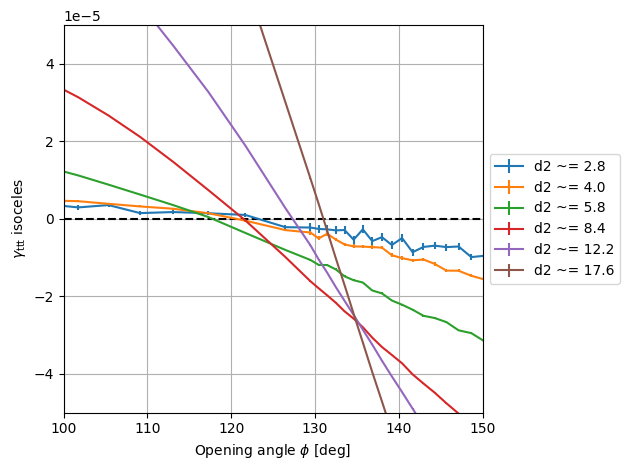

In [15]:
all_g_ttt = []
all_sig_ttt = []
all_meanr = []
all_phi = []

for ggg in [ggg1, ggg2, ggg3, ggg4]:

    g_ttt = -0.25 * (ggg.gam0 + ggg.gam1 + ggg.gam2 + ggg.gam3).real
    var_ttt = 0.25**2 * (ggg.vargam0 + ggg.vargam1 + ggg.vargam2 + ggg.vargam3)

    _nr, nu, nv = g_ttt.shape
    # print(nr,nu,nv)
    assert _nr == nr
    assert nv % 2 == 0
    nv //= 2
    assert nu == 1 or nv == 1

    d1 = ggg.meand1
    d2 = ggg.meand2
    d3 = ggg.meand3
    if nu == 1:
        # if nu==1, then u=1, so d2 = d3, and phi is between d2 and d3
        phi = np.arccos( (d2**2 + d3**2 - d1**2) / (2*d2*d3) )
        meanr = np.array([np.mean([d2[ir], d3[ir]]) for ir in range(nr)])
    else:
        # if nv==1, then v=0, so d1 = d2, and phi is between d1 and d2
        phi = np.arccos( (d1**2 + d2**2 - d3**2) / (2*d1*d2) )
        meanr = np.array([np.mean([d1[ir], d2[ir]]) for ir in range(nr)])
    phi *= 180/np.pi

    # We don't care about v>0 vs v<0, so combine them.
    phi = (phi[:,:,nv-1::-1] + phi[:,:,nv:]) / 2
    g_ttt = (g_ttt[:,:,nv-1::-1] + g_ttt[:,:,nv:]) / 2
    var_ttt = (var_ttt[:,:,nv-1::-1] + var_ttt[:,:,nv:]) / 4
    sig_ttt = var_ttt**0.5

    # print('shapes:')
    print('phi: ',phi.shape)
    # print('g_ttt: ',g_ttt.shape)
    # print('sig_ttt: ',sig_ttt.shape)
    # print('meanr: ',meanr.shape)

    print('meanr =  ',meanr)

    if nu == 1:
        phi = phi[:,0,:]
        g_ttt = g_ttt[:,0,:]
        sig_ttt = sig_ttt[:,0,:]
    else:
        phi = phi[:,:,0]
        g_ttt = g_ttt[:,:,0]
        sig_ttt = sig_ttt[:,:,0]

    # print('shapes ->')
    # print('phi: ',phi.shape)
    # print('g_ttt: ',g_ttt.shape)
    # print('sig_ttt: ',sig_ttt.shape)

    all_phi.append(phi)
    all_g_ttt.append(g_ttt)
    all_sig_ttt.append(sig_ttt)
    all_meanr.append(meanr)
    
phi = np.concatenate(all_phi, axis=1)
g_ttt = np.concatenate(all_g_ttt, axis=1)
sig_ttt = np.concatenate(all_sig_ttt, axis=1)
meanr = np.concatenate(all_meanr, axis=0)

zeros_aberrations = []
fig, ax = plt.subplots()

lines = []
for ir in range(nr):
    # print('ir = ',ir)
    # print('meanr = ',meanr[ir])
    # print('phi = ',phi[ir])
    # print('g = ',g_ttt[ir])
    # print('sig = ',sig_ttt[ir])
    # print()
    if ir < 4:
        continue

    line = ax.errorbar(phi[ir], g_ttt[ir], sig_ttt[ir])
    lines.append((line, 'd2 ~= %.1f'%meanr[ir]))
    
    phi_ex, g_ttt_ex = phi[ir][phi[ir] > 110], g_ttt[ir][phi[ir] > 110]
    phi_ex, g_ttt_ex = phi_ex[phi_ex < 140], g_ttt_ex[phi_ex < 140]
    zeros_aberrations += [phi_ex[np.argmin(np.abs(g_ttt_ex))]]

ax.legend(*(list(zip(*lines))), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'Opening angle $\phi$ [deg]')
ax.set_ylabel(r'$\gamma_{\rm ttt}$ isoceles')

fig.set_tight_layout(True)
ax.grid()
ax.axhline(y=0, ls="--", color="black")
plt.xlim([100, 150])
plt.ylim([-5e-5, 5e-5])
plt.show()
plt.close()

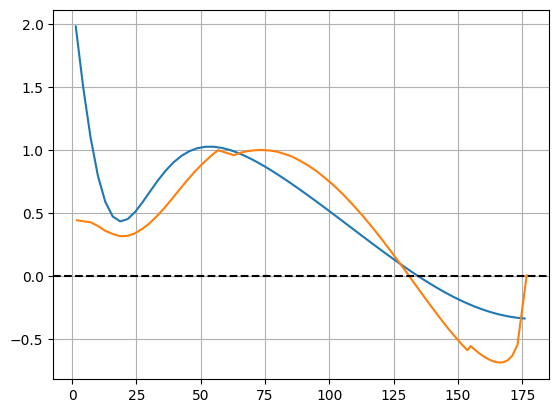

In [23]:
plt.figure()
plt.plot(phi_model[4], g_ttt_model[4] / np.nanmax(g_ttt_model[4][20:]))
plt.plot(phi[-1], g_ttt[-1] / np.nanmax(g_ttt[-1]))
plt.axhline(y=0, ls="--", color="black")
plt.grid()
plt.show()
plt.close()